## Random Sample Imputation

Aim: Random sample imputation consists of taking random observation from the dataset and we use this observation to replace the nan values

When should it be used? 

It assumes that the data are missing completely at random(MCAR)

In [1]:
url='https://raw.githubusercontent.com/Nikhil14384/Feature_Engineering/main/Handling%20missing%20values/titanic.csv'


In [2]:
import pandas as pd
import numpy as np

In [4]:
df=pd.read_csv(url,usecols=['Age','Survived','Fare'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [5]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [9]:
def rand_nan(df,variable,value):
  df[variable+"_median"]=df[variable].fillna(value)
  df[variable+"_random"]=df[variable]
  r_S=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
  #pandas need same index in order to merge the ds
  r_S.index=df[df[variable].isnull()].index
  df.loc[df[variable].isnull(),variable+'_random']=r_S 

In [10]:
med=df.Age.median()

In [11]:
rand_nan(df,'Age',med)

In [ ]:
 df.head(30)

In [15]:
 import matplotlib.pyplot as plt
%matplotlib inline

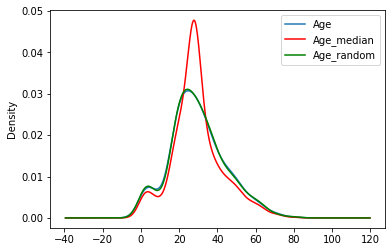

In [17]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax)
df.Age_median.plot(kind='kde', ax=ax, color='red')
df.Age_random.plot(kind='kde', ax=ax, color='Green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

**Advantages**

Easy To implement

There is less distortion in variance

**Disadvantage**

Every situation randomness wont work

## Capturing NaN values with a new Feature

It works well if the data are not missing completly atrandom(NMCAR)

In [18]:
df=pd.read_csv(url,usecols=['Age','Survived','Fare'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [19]:
df['Age_NaN']=np.where(df['Age'].isnull(),1,0)

In [20]:
df.head(10)

,Survived,Age,Fare,Age_NaN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
5,0,NaN,8.4583,1
6,0,54.0,51.8625,0
7,0,2.0,21.0750,0
8,1,27.0,11.1333,0
9,1,14.0,30.0708,0


In [22]:
med=df.Age.median()

In [24]:
df['Age'].fillna(med,inplace=True)

In [25]:
df.head(30)

,Survived,Age,Fare,Age_NaN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
5,0,28.0,8.4583,1
6,0,54.0,51.8625,0
7,0,2.0,21.0750,0
8,1,27.0,11.1333,0
9,1,14.0,30.0708,0


**Advantages**

Easy to implement

Captures the importance of missing values

**Disadvantages**

Creating Additional Features(Curse of Dimensionality)

## End of distribution imputation

In [58]:
df=pd.read_csv(url, usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


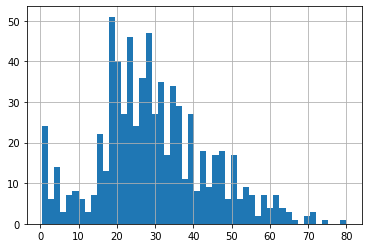

In [59]:
df.Age.hist(bins=50)

In [60]:
extr=df.Age.mean()+3*df.Age.std()
extr

73.27860964406095

In [61]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


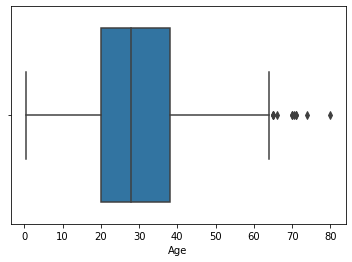

In [62]:
sns.boxplot('Age',data=df)

In [63]:
def impute_nan(df,variable,median,extr):
  df[variable+"_end_distrbution"]=df[variable].fillna(extr)
  df[variable].fillna(median,inplace=True)

In [ ]:
impute_nan(df,'Age',df.Age.median(),extr)
df.head(30)

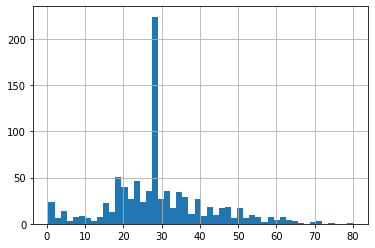

In [65]:
df['Age'].hist(bins=50)

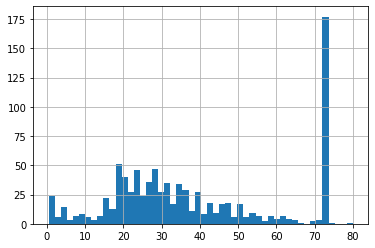

In [66]:
df['Age_end_distrbution'].hist(bins=50)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


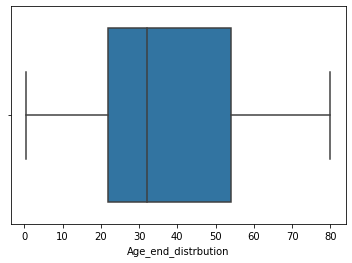

In [68]:
sns.boxplot('Age_end_distrbution',data=df)


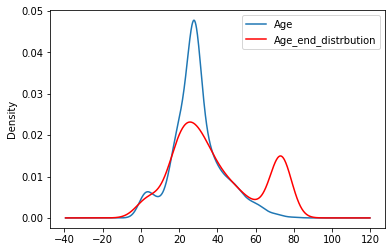

In [69]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax)
df.Age_end_distrbution.plot(kind='kde', ax=ax, color='red')
#df.Age_random.plot(kind='kde', ax=ax, color='Green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')